<a href="https://colab.research.google.com/github/Haebuk/kuggle/blob/main/gamestop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# 데이터 로드

In [2]:
PATH = '/content/drive/MyDrive/input/'
df = pd.read_csv(PATH + 'GME_stock.csv')
print(df.shape)
df.head()

(4773, 7)


,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


# EDA

In [3]:
df.tail()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
4768,2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838
4769,2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017
4770,2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336
4771,2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003
4772,2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666


- 2002년 부터 2021년 1월까지 존재

In [4]:
df.describe()

,open_price,high_price,low_price,close_price,volume,adjclose_price
count,4773.000000,4773.000000,4773.000000,4773.000000,4.773000e+03,4773.000000
mean,23.201005,23.693590,22.714309,23.193234,3.398255e+06,16.882897
std,14.695884,16.210219,13.628194,14.513893,6.547035e+06,11.019953
min,2.850000,2.940000,2.570000,2.800000,6.500000e+04,2.555174
25%,11.360000,11.575000,11.130000,11.350000,1.528900e+06,9.607993
50%,21.760000,22.110001,21.430000,21.760000,2.491800e+06,15.479172
75%,29.420000,30.170000,28.719999,29.430000,3.791600e+06,22.205433
max,354.829987,483.000000,249.000000,347.510010,1.967843e+08,347.510010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            4773 non-null   object 
 1   open_price      4773 non-null   float64
 2   high_price      4773 non-null   float64
 3   low_price       4773 non-null   float64
 4   close_price     4773 non-null   float64
 5   volume          4773 non-null   float64
 6   adjclose_price  4773 non-null   float64
dtypes: float64(6), object(1)
memory usage: 261.1+ KB


- 결측치는 없음

In [6]:
df['date'] = pd.to_datetime(df['date'])

- `date` 컬럼이 object 자료형이므로 datetime 자료형으로 변환

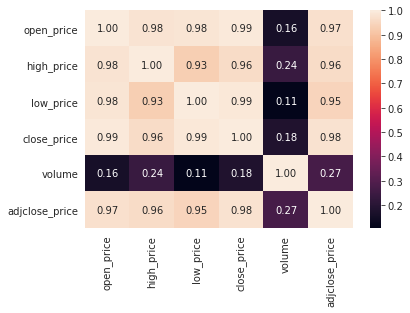

In [7]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

- 거래량 빼고 거의 1에 수렴
- `open_price`와 `volume`만 사용하기로 결정

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


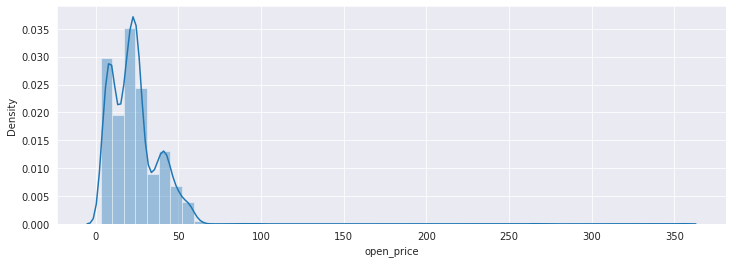

Maximum price: 354.8299865722656
Minimum price: 2.8499999046325684


In [8]:
plt.figure(figsize=(12, 4))
sns.distplot(df['open_price'])
plt.show()

print('Maximum price:', df['open_price'].max())
print('Minimum price:', df['open_price'].min())

- 오른쪽 꼬리분포
- 로그 변환?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


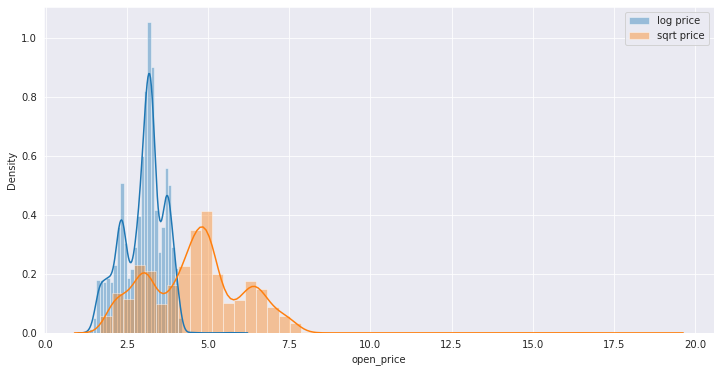

In [9]:
plt.figure(figsize=(12, 6))
sns.distplot(np.log1p(df['open_price']), label='log price')
sns.distplot(np.sqrt(df['open_price']), label='sqrt price')
plt.legend()
plt.show()

- 변환을 했을 때 비교적 꼬리가 짧은 로그 변환을 사용하기로 결정

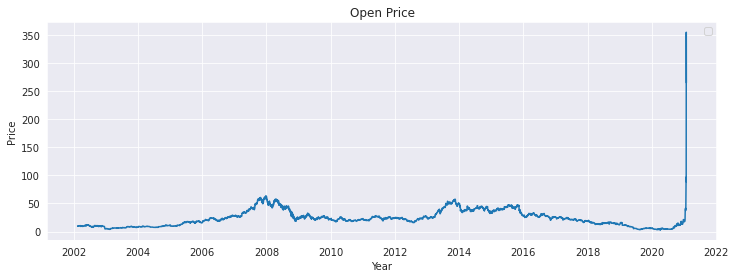

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'][::-1],df['open_price'][::-1])
plt.title('Open Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend([])
plt.show()

- 최근 공매도로 가격이 급상승한 현상이 있었음

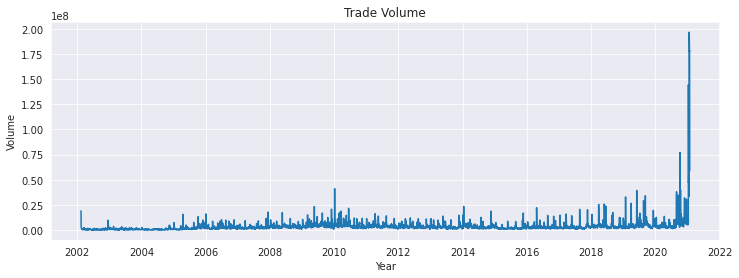

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(df['date'][::-1],df['volume'][::-1])
plt.title('Trade Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

- 거래량 폭증도 관련있는듯

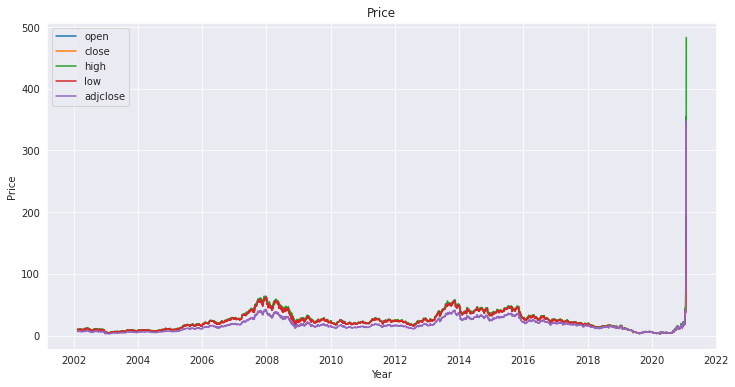

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'][::-1],df['open_price'][::-1], label='open')
plt.plot(df['date'][::-1],df['close_price'][::-1], label='close')
plt.plot(df['date'][::-1],df['high_price'][::-1], label='high')
plt.plot(df['date'][::-1],df['low_price'][::-1], label='low')
plt.plot(df['date'][::-1],df['adjclose_price'][::-1], label='adjclose')
plt.title('Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

- 높은 상관관계 답게 다섯 가지 그래프가 거의 유사한 경향

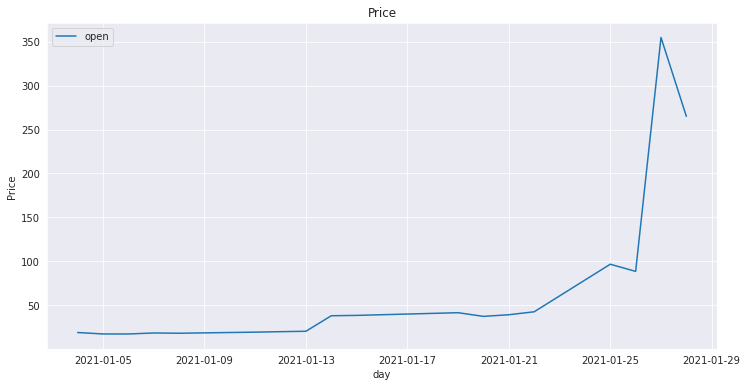

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'][:18][::-1],df['open_price'][:18][::-1], label='open')
plt.title('Price')
plt.xlabel('day')
plt.ylabel('Price')
plt.legend()
plt.show()

- 최근에 가격 변동이 심해서 과거 데이터가 크게 영향을 미칠 것 같진 않음
    - 2010년 이전 데이터 삭제
    - 2021년 7월까지 데이터 수집
    - 결과적으로 2010/01 ~ 2021/07 데이터 사용 예정

# 추가 데이터

In [30]:
df = pd.read_csv(PATH + 'GME_to_July.csv')
df.rename(columns={'Date': 'date', 'Open': 'open_price', 'High': 'high_price', 'Low': 'low_price', 'Close': 'close_price', 'Adj Close': 'adjclose_price', 'Volume': 'volume'}, inplace=True)
df.head()

,date,open_price,high_price,low_price,close_price,adjclose_price,volume
0,2010-01-04,22.070000,22.950001,22.000000,22.900000,15.418571,6675700
1,2010-01-05,22.910000,23.740000,22.900000,23.520000,15.836020,5317400
2,2010-01-06,23.459999,24.100000,23.219999,24.030001,16.179401,5367800
3,2010-01-07,20.010000,21.170000,19.420000,20.459999,13.775718,41190300
4,2010-01-08,20.639999,21.230000,20.230000,20.290001,13.661260,11968100


In [31]:
df.tail()

,date,open_price,high_price,low_price,close_price,adjclose_price,volume
2909,2021-07-26,180.360001,186.039993,178.759995,183.940002,183.940002,1260600
2910,2021-07-27,183.000000,185.000000,176.660004,178.539993,178.539993,1214800
2911,2021-07-28,175.720001,177.119995,164.270004,169.119995,169.119995,4100800
2912,2021-07-29,170.600006,173.889999,164.509995,164.860001,164.860001,2240000
2913,2021-07-30,165.000000,167.220001,158.869995,161.119995,161.119995,2373500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            2914 non-null   object 
 1   open_price      2914 non-null   float64
 2   high_price      2914 non-null   float64
 3   low_price       2914 non-null   float64
 4   close_price     2914 non-null   float64
 5   adjclose_price  2914 non-null   float64
 6   volume          2914 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.5+ KB


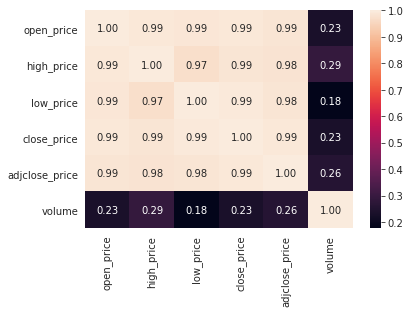

In [33]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

- correlation 위에서 했던 거랑 비슷
- `open_price`와 `volume` 빼고 drop

In [35]:
df.drop(['high_price', 'low_price', 'close_price', 'adjclose_price'], axis=1, inplace=True)
df.head(3)

,date,open_price,volume
0,2010-01-04,22.070000,6675700
1,2010-01-05,22.910000,5317400
2,2010-01-06,23.459999,5367800


In [41]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914 entries, 0 to 2913
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2914 non-null   datetime64[ns]
 1   open_price  2914 non-null   float64       
 2   volume      2914 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 68.4 KB


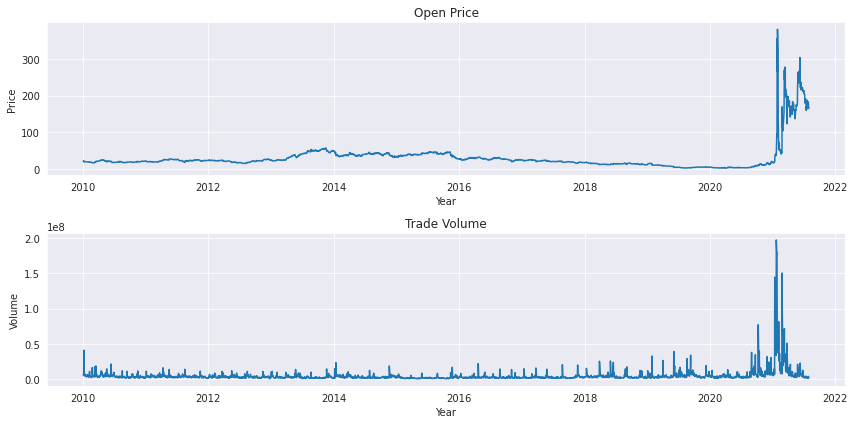

In [48]:
f, ax = plt.subplots(2,1,figsize=(12, 6))

ax[0].plot(df['date'][::-1], df['open_price'][::-1])
ax[0].set_title('Open Price')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Price')

ax[1].plot(df['date'][::-1], df['volume'][::-1])
ax[1].set_title('Trade Volume')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Volume')

plt.tight_layout()
plt.show()

# 데이터 저장

In [53]:
df.to_csv(PATH + 'GME_done.csv', index=False)

# 2-3주차 계획
## 2주차: Best Model 선정
 - 모델: 이동 평균, ARIMA, LightGBM, LSTM 사용
 - 평가지표: Acc & RMSLE
 - CV: TimeSeriesCV, 5Fold
 - 5 Fold average RMSLE 가장 낮은 모델 선정

## 3주차: HPO(Hyperparameter optimization) + Inference
- 2주차에서 선정한 모델 HPO 진행
- Tool: Weight & Bias
- HPO 끝낸 모델을 이용해 8월 데이터를 이용해 Testing 후 마무리